In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.ion()
import seaborn as sns

In [2]:
datapath1 = "/Users/aavattikutis/Documents/epidemicmodel/cccruns/fits/run1/"
datapath2 = "/Users/aavattikutis/Documents/epidemicmodel/cccruns/fits/run2/"
models = ["fulllinearmodel_fit_table.csv","reducedlinearmodelNegBinom_fit_table.csv",
          "reducedlinearmodelq0_fit_table.csv","reducedlinearmodelq0ctime_fit_table.csv"]


In [3]:
df = pd.read_csv(datapath2 + models[0]) #just to get parameters

#get roi
rois = df.roi.unique()
#get inferred
theta = df.columns[2:] 
ntheta = len(theta)



0


TypeError: distplot() got an unexpected keyword argument 'alpha'

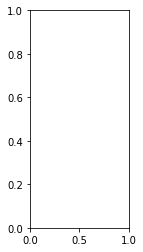

In [19]:
#plot side by side 

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
             
roi_us = np.sort([i for i in rois if i[:2]=='US'])[::-1]
roi_other = np.sort([i for i in rois if i[:2]!='US'])[::-1]
rois = list(roi_us) + list(roi_other)
# print(rois)


c_ = sns.color_palette("Set1", n_colors=4, desat=.5)
plt.figure(1)
k = -1
for model in models:
    k += 1
    print(k)
    df = pd.read_csv(datapath2 + model) #just to get parameters
    ll_ = []
    waic_ = []
    loo_ = []
    for roi in rois:
        try:
            ll_ += [df.loc[(df.roi==roi)&(df['quantile']==0.5),'ll_'].values[0]]
        except:
            print('ll_')
            print(model)
            print(roi)
        try:
            waic_ += [df.loc[(df.roi==roi)&(df['quantile']==0.5),'waic'].values[0]]  
        except:
            print('waic_')
            print(model)
            print(roi)  
        try:
            loo_ += [df.loc[(df.roi==roi)&(df['quantile']==0.5),'loo'].values[0]]  
        except:
            print('loo_')
            print(model)
            print(roi) 
        
    plt.subplot(1,3,1)             
    sns.distplot(ll_,kde=False,color=c_[k])
    plt.title('ll_')
    plt.subplot(1,3,2)             
    sns.distplot(waic_,kde=False,color=c_[k])
    plt.title('waic')
    plt.subplot(1,3,3)             
    sns.distplot(loo_,kde=False,color=c_[k])  
    plt.title('loo')
           
    
    
# fig, axes = plt.subplots(1,3, figsize=(15,5))
# plt.subplot(1,3,1)

# mu = round(np.median(R0_),3)
# plt.axvline(mu,linestyle='dashed',color='k')
# plt.text(mu+1,40,mu,rotation=0)
# simpleaxis(plt.gca())
# plt.title('R0')
# plt.ylim((0,120))